In [21]:
import vaex
from glob import glob
from os.path import join, abspath
from os import pardir
import numpy as np
from matplotlib import pyplot as plt
import sys
from datetime import datetime
from time import time

In [2]:
current = abspath('')
# import utils
root_dir = abspath(join(current, pardir))
if not root_dir in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/2_Cleaning',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [3]:
from utils import safe_mkdir

In [4]:
# root data directory
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [5]:
# Combine gaia with others
name = "Combine"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Combine already exist. Good to go!


In [6]:
# load Gaia-2MASS
name = "Gaia-2MASS-old"
gaia_dir = join(root_data_dir, name)
gaia_files = glob(join(gaia_dir, "*.hdf5"))
gaia_files.sort()
gaia_files[:5]

['/home2/s20321005/Thesis-Project/Data/Gaia-2MASS-old/gaia-000-001.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Gaia-2MASS-old/gaia-001-002.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Gaia-2MASS-old/gaia-002-003.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Gaia-2MASS-old/gaia-003-004.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Gaia-2MASS-old/gaia-004-005.hdf5']

In [45]:
gaia = vaex.open_many(gaia_files)
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs
0,0.035724,-89.033127,15.052,14.149,UCU,999999,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--
1,0.063679,-89.064964,16.05,14.818,ABB,4611985154309689728,22.728117,18.444002843809276,0.2338192,13.281042088032434,0.17243546,1.9008664677626548,0.14516754,18.659096,19.952793,17.509138,14.816096,92.14082,0.961987,1.434219,nan,nan,303.16646276195394,-28.03992520733377,3567.7712,3540.4517,3591.2698,4.8081,4.7134,4.8715,-0.5701,-0.7321,-0.4132,511.7533,482.8406,543.6623,0.5659,0.532,0.5969,nan,nan,nan,nan,nan,nan,nan,nan,nan,
2,0.065677,-89.440903,16.832,15.721,CCD,4611773979359229696,12.257193,10.270257194694619,0.5276517,-6.690335307418338,0.73907304,1.6194768785625475,0.46543595,20.19899,21.46941,18.940907,5.781402,32.732517,1.0632449,1.5661117,nan,nan,303.07168987844585,-27.673373331486737,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,
3,0.067073,-89.130386,15.453,14.788,AAB,4611972995259913856,6.025634,6.025590956511702,0.08982857,-0.022785710268113032,0.08030422,0.4389235852794528,0.065967396,17.134779,17.24778,16.258772,32.04953,42.694496,1.1276225,1.5967586,nan,nan,303.15001941439283,-27.976158120916963,5370.4893,5230.6763,5469.612,4.6165,4.5889,4.6439,-4.09,-4.1346,-3.9684,1469.2878,1397.0767,1547.8292,0.2059,0.114,0.2668,nan,nan,nan,nan,nan,nan,nan,nan,nan,unknown
4,0.073027,-89.090446,16.496,15.626,BCD,4611973334559675520,25.610413,16.575461579958816,0.34182423,19.52299381259894,0.28071013,1.592105289450467,0.2394431,19.371336,20.924316,18.204302,11.63563,72.14884,1.0419273,1.4066671,nan,nan,303.15991607268876,-28.01514667876553,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"470,994,547",359.810097,89.324234,14.997,14.232,AAA,2305750276576372992,8.857864,6.944159435779551,0.11212577,5.499127944254394,0.10824461,1.205446625880747,0.094102494,17.168484,18.000036,16.238264,72.4173,245.3936,1.5241516,1.3286858,nan,nan,122.76153347754278,26.469842071615023,4298.786,4278.832,4319.986,4.5658,4.5311,4.5965,-0.2744,-0.3633,-0.2046,770.3177,733.2712,814.6207,0.631,0.6054,0.6582,nan,nan,nan,nan,nan,nan,nan,nan,nan,K
"470,994,548",359.823644,89.644913,16.03,15.244,ACC,2305819541512528000,3.4697785,-3.342122996741894,0.119936794,0.9325107043887829,0.117376596,0.4851752777039695,0.10464805,17.959993,18.600903,17.200064,60.444508,90.97874,1.2257977,1.2494738,nan,nan,122.84219430111504,26.782347051064967,4269.341,4247.4688,4306.5337,4.8617,4.8323,4.8833,-1.2823,-1.3655,-1.1797,900.6884,867.4188,955.5297,0.0374,0.0109,0.0773,nan,nan,nan,nan,nan,nan,nan,nan,nan,
"470,994,549",359.843856,89.67437,15.542,14.9,ABB,2305819889406320896,9.0640955,-7.454146195987413,0.071599096,5.15689180333323,0.07226797,0.6795685788179534,0.061488032,17.302055,17.939072,16.520681,82.97307,178.90265,1.0247828,1.2678266,nan,nan,122.84974923386562,26.81102679181763,4885.6157,4807.968,5140.507,4.706,4.6177,4.7477,-0.8927,-1.0705,-0.488,990.8027,918.4789,1238.6727,0.5979,0.5382,0.7565,nan,nan,nan,nan,nan,nan,nan,nan,nan,F
"470,994,550",359.851795,89.1772,12.139,

In [ ]:
# gaia = (gaia_.filter("parallax > 0")
#                     .filter("e_parallax/parallax < 0.15")
#                     .filter("bpmag - rpmag > -3")
#                     .filter("bpmag - rpmag < 6")
#                     .filter("gmag > 3")
#                     .filter("gmag < 21")
#                     .filter("fb_over_err > 10")
#                     .filter("fr_over_err > 10")
#                     .filter("ruwe < 1.4")
#                     .filter("1.0+0.015*(bpmag - rpmag)**2 < excess_factor")
#                     .filter("1.3+0.06*(bpmag - rpmag)**2 > excess_factor")
#                     .filter("Jmag < 13.5")
#                     .filter("Jmag > 0")
#                )
# gaia

# RAVE6

In [47]:
name = "rave"
data_dir_rave = join(data_dir, name)
safe_mkdir(data_dir_rave)
data_dir_rave

Directory /home2/s20321005/Thesis-Project/Data/Combine/rave already exist. Good to go!


'/home2/s20321005/Thesis-Project/Data/Combine/rave'

In [48]:
# load RAVE
name = "RAVE6"
rave_dir = join(root_data_dir, name)
rave = vaex.open(join(rave_dir, "rave6.hdf5"))
rave

#,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,source_id
0,-37.893,4.791,3953.0,2.41,0.11,0.13,4973212867641442560
1,4.044,6.539,8286.0,4.91,0.39,0.0,4973250147957768832
2,-2.564,6.833,3813.0,2.89,0.38,0.38,4976544490953365632
3,77.837,1.993,4962.0,3.24,-0.61,0.07,4976851014178872448
4,3.519,4.035,4171.0,2.61,-0.14,0.19,4972468120311892096
...,...,...,...,...,...,...,...
"450,973",-0.753,1.277,5908.0,4.32,-0.01,0.11,6523116137833329792
"450,974",-1.839,2.183,5726.0,3.84,0.01,0.18,6523133145903856768
"450,975",7.603,1.202,3927.0,4.07,-0.41,0.0,6524623911873631104
"450,976",25.576,1.922,5654.0,4.33,0.05,0.19,6522142314129013504


In [49]:
rv = rave.dropnan(['rv_rave'])
rv

#,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,source_id
0,-37.893,4.791,3953.0,2.41,0.11,0.13,4973212867641442560
1,4.044,6.539,8286.0,4.91,0.39,0.0,4973250147957768832
2,-2.564,6.833,3813.0,2.89,0.38,0.38,4976544490953365632
3,77.837,1.993,4962.0,3.24,-0.61,0.07,4976851014178872448
4,3.519,4.035,4171.0,2.61,-0.14,0.19,4972468120311892096
...,...,...,...,...,...,...,...
"450,973",-0.753,1.277,5908.0,4.32,-0.01,0.11,6523116137833329792
"450,974",-1.839,2.183,5726.0,3.84,0.01,0.18,6523133145903856768
"450,975",7.603,1.202,3927.0,4.07,-0.41,0.0,6524623911873631104
"450,976",25.576,1.922,5654.0,4.33,0.05,0.19,6522142314129013504


In [50]:
has_gaia = rv.dropna(['source_id'])
has_gaia

#,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,source_id
0,-37.893,4.791,3953.0,2.41,0.11,0.13,4973212867641442560
1,4.044,6.539,8286.0,4.91,0.39,0.0,4973250147957768832
2,-2.564,6.833,3813.0,2.89,0.38,0.38,4976544490953365632
3,77.837,1.993,4962.0,3.24,-0.61,0.07,4976851014178872448
4,3.519,4.035,4171.0,2.61,-0.14,0.19,4972468120311892096
...,...,...,...,...,...,...,...
"450,973",-0.753,1.277,5908.0,4.32,-0.01,0.11,6523116137833329792
"450,974",-1.839,2.183,5726.0,3.84,0.01,0.18,6523133145903856768
"450,975",7.603,1.202,3927.0,4.07,-0.41,0.0,6524623911873631104
"450,976",25.576,1.922,5654.0,4.33,0.05,0.19,6522142314129013504


In [63]:
file = gaia_files[0]
gaia_clean = vaex.open(file)
gaia_pandas = gaia_clean.to_pandas_df()
gaia_pandas = gaia_pandas.drop_duplicates(subset=['source_id'])
gaia_clean = vaex.from_pandas(gaia_pandas)
gaia_clean

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs
0,0.035724,-89.033127,15.052,14.149,UCU,999999,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--
1,0.063679,-89.064964,16.05,14.818,ABB,4611985154309689728,22.728117,18.444002843809276,0.2338192,13.281042088032434,0.17243546,1.9008664677626548,0.14516754,18.659096,19.952793,17.509138,14.816096,92.14082,0.961987,1.434219,nan,nan,303.16646276195394,-28.03992520733377,3567.7712,3540.4517,3591.2698,4.8081,4.7134,4.8715,-0.5701,-0.7321,-0.4132,511.7533,482.8406,543.6623,0.5659,0.532,0.5969,nan,nan,nan,nan,nan,nan,nan,nan,nan,
2,0.065677,-89.440903,16.832,15.721,CCD,4611773979359229696,12.257193,10.270257194694619,0.5276517,-6.690335307418338,0.73907304,1.6194768785625475,0.46543595,20.19899,21.46941,18.940907,5.781402,32.732517,1.0632449,1.5661117,nan,nan,303.07168987844585,-27.673373331486737,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,
3,0.067073,-89.130386,15.453,14.788,AAB,4611972995259913856,6.025634,6.025590956511702,0.08982857,-0.022785710268113032,0.08030422,0.4389235852794528,0.065967396,17.134779,17.24778,16.258772,32.04953,42.694496,1.1276225,1.5967586,nan,nan,303.15001941439283,-27.976158120916963,5370.4893,5230.6763,5469.612,4.6165,4.5889,4.6439,-4.09,-4.1346,-3.9684,1469.2878,1397.0767,1547.8292,0.2059,0.114,0.2668,nan,nan,nan,nan,nan,nan,nan,nan,nan,unknown
4,0.073027,-89.090446,16.496,15.626,BCD,4611973334559675520,25.610413,16.575461579958816,0.34182423,19.52299381259894,0.28071013,1.592105289450467,0.2394431,19.371336,20.924316,18.204302,11.63563,72.14884,1.0419273,1.4066671,nan,nan,303.15991607268876,-28.01514667876553,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"492,461",0.777458,89.107071,16.397,15.463,BCC,576317197316681984,5.8159885,4.6503373196196796,0.314001,3.4928617382547644,0.33658203,1.7270819258997259,0.28737998,19.328701,20.905706,18.16214,9.659323,32.614647,1.1007087,1.402335,nan,nan,122.72353403718911,26.255095559047387,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,
"492,462",0.79303,89.005005,16.193,15.835,ACD,576310497167602688,3.0507236,-1.6277612484209945,0.09963153,2.5801759820703984,0.09425513,0.25798121283314457,0.088577904,17.669441,18.12738,17.05587,132.23161,134.8385,1.0329734,1.216353,nan,nan,122.70014427105914,26.155008613983675,5038.1846,4905.743,5215.6826,4.7389,4.6908,4.8296,-1.0856,-1.6826,-0.6764,1517.0503,1269.1823,1767.5712,0.1314,0.0234,0.2368,nan,nan,nan,nan,nan,nan,nan,nan,nan,
"492,463",0.856221,89.263672,12.246,11.565,AAA,576413821198428416,37.931732,19.44744306501421,0.015040985,32.56705677323911,0.015052103,3.724639955853196,0.0133335395,13.971805,14.59627,13.216334,1213.5786,1659.5946,1.1046042,1.2521334,-45.57679,2.2679815,122.76109190279476,26.408014305717995,4456.6523,4443.9727,4465.4053,4.5275,4.5193,4.5314,-0.2331,-0.2478,-0.2198,276.0482,274.105,281.2514,0.1053,0.0917,0.1154,nan,nan,nan,nan,nan,nan,nan,nan,nan,K
"492,464",0.932587,89.725365,14.017,13.278,AAA,576451204593720832,12.769733,5.066254391491568,0.0382

In [66]:
# Join
cols = rave.column_names
for file in gaia_files:
    gaia_clean = vaex.open(file)
    gaia_pandas = gaia_clean.to_pandas_df()
    gaia_pandas = gaia_pandas.drop_duplicates(subset=['source_id'])
    gaia_clean = vaex.from_pandas(gaia_pandas)
    name = file.split("/")[-1]
    print(f"{name}, clean: {len(gaia_clean)}, raw: {len(gaia)}, {np.round(len(gaia_clean)/len(gaia)*100,2)}%")
    # join_rave = gaia_clean.join(rave, on="source_id", how="left")
    join_rave = rave.join(gaia_clean, on="source_id", how="inner")
    for col in cols:
        if col == "source_id": continue
        join_rave[col] = join_rave[col].to_pandas_series().to_numpy() # Do this to make np.nan value to no value
    join_rave.export(join(data_dir_rave, name), progress=True) # save the result if necessary
join_rave

gaia-000-001.hdf5, clean: 492466, raw: 470994552, 0.1%
export(hdf5) [########################################] 100.00% elapsed time  :     0.58s =  0.0m =  0.0h
 gaia-001-002.hdf5, clean: 479924, raw: 470994552, 0.1%
export(hdf5) [########################################] 100.00% elapsed time  :     0.51s =  0.0m =  0.0h  
 gaia-002-003.hdf5, clean: 483405, raw: 470994552, 0.1%
export(hdf5) [########################################] 100.00% elapsed time  :     0.72s =  0.0m =  0.0h
 gaia-003-004.hdf5, clean: 481163, raw: 470994552, 0.1%
export(hdf5) [########################################] 100.00% elapsed time  :     0.52s =  0.0m =  0.0h 
 gaia-004-005.hdf5, clean: 474070, raw: 470994552, 0.1%
export(hdf5) [########################################] 100.00% elapsed time  :     0.53s =  0.0m =  0.0h
 gaia-005-006.hdf5, clean: 472784, raw: 470994552, 0.1%
export(hdf5) [########################################] 100.00% elapsed time  :     0.50s =  0.0m =  0.0h
 gaia-006-007.hdf5, clean:

#,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,source_id,ra,dec,Jmag,Kmag,ph_qual,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs
0,8.288,3.325,5923.0,4.22,0.03,0.09,6521984121893093120,359.347646,-51.051823,10.422,10.023,AAA,12.668094,12.606415461989814,0.014110323,-1.2485493970760204,0.018813001,2.0253342661952543,0.023791121,11.4876995,11.837173,10.971456,2549.1914,4154.6187,1.59564,1.2028177,6.876149,0.3219662,322.4887761098035,-63.9749588543307,5599.219,5595.8145,5606.192,4.0195,4.0156,4.0379,-0.2617,-0.2657,-0.2554,441.6703,427.4324,444.7439,0.002,0.0004,0.0056,0.1,0.07,0.11,-0.07,-0.09,-0.05,-0.01,-0.15,0.17,G
1,35.865,4.942,5265.0,3.83,-0.11,0.2,6523486295295829504,359.30781,-50.905987,9.509,9.194,AAA,43.99714,-43.917573416665334,0.0105391815,-2.644779226317138,0.015254995,4.688621066135538,0.018281069,10.429168,10.713454,9.980854,5122.2886,6013.2847,1.2607154,1.1942724,31.500162,0.20173362,322.6981357864998,-64.09119739985194,6130.4185,6127.3604,6133.428,4.2204,4.2181,4.2227,-0.2612,-0.2642,-0.2584,212.6671,211.848,213.5173,0.0534,0.0518,0.0549,-0.07,-0.09,-0.05,0.1,0.09,0.11,-0.06,-0.18,0.05,F
2,92.393,4.944,3500.0,3.89,-0.35,0.37,6523534570727611648,359.125072,-50.824467,12.153,11.865,AAA,4.645608,1.148099539170874,0.008900207,-4.501504219762659,0.0121954465,1.008798277618916,0.0143065555,12.961687,13.196701,12.578729,2778.5225,3203.3855,1.0132247,1.1830256,89.73567,1.5739497,323.018900083772,-64.10737933363484,6601.0566,6597.1406,6605.7583,4.087,4.0652,4.0959,-0.403,-0.4097,-0.4004,915.1139,904.5346,943.7161,0.1348,0.1327,0.1367,nan,nan,nan,nan,nan,nan,nan,nan,nan,F
3,-4.937,6.183,5010.0,2.94,0.25,0.12,6521814655365950464,359.820655,-52.165257,11.499,11.176,AAA,8.402637,6.7728411212212345,0.00824954,-4.973220188452688,0.010590728,1.8586586901511002,0.011185425,12.508627,12.834778,12.026952,2741.7722,2980.814,0.96530205,1.1930109,-4.5784125,0.68112296,320.7554370040214,-63.12055758880794,5715.781,5713.0356,5728.2954,4.233,4.227,4.2624,0.0148,0.0096,0.0252,515.5779,489.2572,520.9936,0.0019,0.0003,0.0088,0.42,0.3,0.51,-0.12,-0.2,-0.01,nan,nan,nan,G
4,16.98,1.96,3930.0,1.86,0.09,0.22,6521943886639416960,359.397258,-51.527576,9.318,8.248,AAA,4.0852675,4.050600372493842,0.014839239,-0.5310797920411615,0.018443218,0.36174603639798003,0.022853855,11.477964,12.353274,10.548148,680.5342,1236.7715,1.5081439,1.3149978,16.382627,0.19312622,321.92124411072336,-63.56949641211834,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-0.71,-0.74,-0.68,0.33,0.32,0.35,-0.07,-0.2,0.04,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,154",16.749,1.354,6188.0,4.36,-0.29,0.18,6521243257213155968,359.270764,-53.814087,10.953,10.633,AAA,2.0881202,-1.8475617215699687,0.010931785,0.9730166812796581,0.012890409,3.011896649706302,0.013406136,11.896255,12.187269,11.443655,2585.3135,2821.8074,1.076749,1.1933409,14.739625,0.5802492,319.82966022213276,-61.494748472768464,5884.4194,5883.2275,5886.222,4.2834,4.2792,4.2875,-0.3028,-0.3071,-0.2988,321.2733,319.801,322.7643,0.0005,1e-04,0.0014,-0.39,-0.48,-0.09,0.33,0.21,0.41,nan,nan,nan,G
"1,155",-7.977,2.043,6073.0,4.62,-0.02,0.1,6521828987673793024,359.476601,-52.100163,11.053,10.712,AAA,6.719543,-6.126314985244846,0.014323125,-2.7605299412980764,0.018121604,1.8487028845243303,0.019754454,12.04169

In [67]:
#quick look
quick = vaex.open_many(glob(join(data_dir_rave, "*.hdf5")))
quick

#,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,source_id,ra,dec,Jmag,Kmag,ph_qual,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs
0,-20.169,4.304,4786.0,2.74,0.0,0.13,6286704164149086464,219.655143,-15.609369,8.892,8.188,AAA,3.4869146,-3.3411933891453067,0.01649509,-0.9974970637284706,0.01602046,1.1200994757563778,0.017629525,10.713037,11.356183,9.946146,1351.612,2639.611,1.0535316,1.2540983,-17.490528,0.18792775,337.442761534955,39.97298796216244,4821.99,4815.311,4828.8516,2.7016,2.6918,2.7183,0.1294,0.1248,0.1382,818.6559,804.6221,826.4486,0.5187,0.5143,0.5234,-0.12,-0.14,-0.09,-0.07,-0.08,-0.06,-0.12,-0.23,0.0,K
1,-5.47,5.046,3586.0,3.39,0.28,0.19,6286597404145785216,219.428628,-15.881729,10.127,9.7,AAA,66.31049,-28.412415097911598,0.02341032,-59.91507526728068,0.01935782,4.94758627029731,0.02447866,11.339757,11.71053,10.792753,1239.681,2500.6318,1.0376897,1.2120665,-7.3835917,0.6438819,337.01480157702827,39.85395669964236,5826.2544,5823.1206,5829.4536,4.3271,4.3234,4.3306,-0.37,-0.3751,-0.3652,196.8098,195.8612,197.8385,0.2988,0.2968,0.3007,-0.39,-0.71,-0.25,0.31,0.2,0.54,nan,nan,nan,G
2,-43.357,7.619,3554.0,3.65,0.11,0.31,6286686194006062464,219.978841,-15.672907,11.764,11.461,AAA,16.9606,-15.852125646610164,0.032846656,-6.030924256049547,0.03530048,1.769975628351585,0.036543038,12.850875,13.167588,12.365627,1033.8229,1926.6958,1.0687437,1.1998603,-35.03536,5.7990427,337.74464594092177,39.7551113916234,6046.0566,6026.6704,6066.797,4.0585,3.9909,4.0913,-0.6478,-0.669,-0.6153,611.1732,585.1034,682.5847,0.209,0.1993,0.2195,nan,nan,nan,nan,nan,nan,nan,nan,nan,F
3,7.884,8.275,6071.0,4.42,0.25,0.32,6286584420460998400,219.531666,-15.941563,12.08,11.765,AAA,17.028513,-16.37221488933462,0.024055624,-4.681970549186609,0.019292802,1.175410770929037,0.023686113,13.146798,13.455355,12.664797,1083.7788,2391.6287,1.4543347,1.2019814,11.916142,3.459665,337.0848482192867,39.7516213964895,6286.715,6249.9907,6320.5522,3.8508,3.8116,3.8761,-0.9599,-0.9836,-0.9351,974.7121,944.0793,1019.8837,0.2936,0.2787,0.309,nan,nan,nan,nan,nan,nan,nan,nan,nan,F
4,-24.085,5.951,3703.0,2.61,-0.14,0.21,6286539787160698240,219.08831,-16.416239,10.71,10.41,AAA,18.610386,-17.20030236846909,0.018120367,-7.106056657431765,0.015250095,3.0666761678521626,0.019017346,11.739696,12.055,11.2565155,1196.4572,2605.9785,1.0012422,1.1993114,-25.62343,1.7994858,336.2932713043729,39.56393958851663,5949.7466,5929.797,5969.75,4.2794,4.2643,4.2847,-0.326,-0.3453,-0.3056,323.4047,320.6097,332.4316,0.1396,0.1303,0.1499,-0.04,-0.19,0.16,0.15,-0.02,0.26,nan,nan,nan,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"446,446",10.279,1.292,6916.0,4.91,-0.18,0.01,4698007100072349824,33.274584,-66.470993,11.099,10.847,AAA,3.411009,-3.396302504265305,0.013535229,-0.3164057775317683,0.012364936,2.1708907057240783,0.010974484,11.925995,12.164117,11.53068,1439.1412,2449.5793,1.0232276,1.1882119,6.4449916,0.8410476,290.7561610937828,-48.681581032617586,6336.8643,6326.5786,6351.478,4.1359,4.1299,4.1421,-0.601,-0.6119,-0.5818,456.9001,454.1435,461.2156,0.041,0.0363,0.0473,-0.39,-0.56,-0.18,0.25,0.13,0.38,nan,nan,nan,F
"446,447",12.023,1.435,6536.0,4.78,-0.05,0.09,4694985775262614528,33.298097,-66.910156,11.002,10.731,AAA,3.6052144,3.443692683247644,0.01388185,1.067029172330035,0.013472734,2.188474466

check if something weird is going on with the data

In [68]:
gaia_filt = quick.filter("1000/parallax < 200")
gaia_filt = gaia_filt.extract()
gaia_filt

#,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,source_id,ra,dec,Jmag,Kmag,ph_qual,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs
0,23.315,7.55,4861.0,3.82,0.43,0.18,6279741158872601472,219.29902,-21.462772,10.813,10.28,AAA,8.829687,-4.456678456054613,0.016397158,-7.622426557582301,0.01437679,5.399967227248751,0.016968826,12.189718,12.658676,11.556529,350.35767,518.80676,1.1756551,1.2250553,17.625717,0.99151164,333.35552366534074,35.08532122565192,5083.2163,5071.1226,5096.436,4.5249,4.5215,4.5284,-0.04,-0.0521,-0.0284,184.3435,183.759,184.8816,0.1432,0.1353,0.1517,0.34,0.22,0.51,0.05,-0.02,0.12,nan,nan,nan,K
1,4.595,3.969,3943.0,3.77,0.15,0.07,6278461400353723136,219.23623,-22.980255,10.657,9.828,AAA,61.378616,54.399044398700035,0.023156838,-28.426720501861524,0.020073142,11.403015818377257,0.02491186,12.7857275,13.694302,11.848829,648.648,1455.6438,1.278522,1.3117136,4.115794,1.5764862,332.41086076115084,33.78171343097785,4102.885,4100.6353,4105.471,4.6646,4.662,4.667,0.0113,0.0061,0.0175,87.4251,87.2716,87.5861,0.4293,0.4267,0.4316,-0.11,-0.24,0.01,0.2,0.14,0.23,nan,nan,nan,K
2,-32.878,5.865,3511.0,4.61,0.16,0.05,6325246822705992832,219.286324,-10.208799,10.651,9.79,AAA,58.034973,-47.1489143939437,0.020236012,-33.83841200631324,0.016182503,12.813278550682494,0.018085716,13.301383,14.624753,12.169109,646.4172,1020.11896,1.3463106,1.4086692,-24.342127,7.363014,340.98204230546685,44.712752830094516,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,M
3,-47.074,3.696,6210.0,4.77,0.41,0.0,6325188617309176576,219.127095,-10.478321,9.882,9.419,AAA,133.7423,-126.20814860153646,0.024667453,-44.254972045638894,0.022597065,6.324147521409492,0.02124536,11.208808,11.642476,10.612759,1479.5623,2489.812,1.0719355,1.2152487,-48.129185,0.7028729,340.5882115791573,44.57571339985151,5252.557,5238.435,5264.7456,4.4319,4.429,4.4351,0.1129,0.0981,0.1269,156.8375,156.1172,157.447,0.1105,0.1018,0.1181,0.45,0.42,0.48,-0.16,-0.19,-0.12,nan,nan,nan,G
4,24.821,4.09,3617.0,3.18,-0.09,0.29,6329843704727091328,219.296652,-9.06833,10.845,10.355,AAA,52.06572,-27.929734655436654,0.01869158,-43.94051928813335,0.017693762,5.431065248761104,0.018228613,12.189724,12.628875,11.584333,1155.5502,1602.761,1.1607513,1.2190963,19.798864,0.8691713,341.9035353979657,45.650239567425736,5298.42,5291.7573,5304.1064,4.6051,4.5994,4.6092,-0.1457,-0.1525,-0.1396,181.4655,180.8881,182.1471,0.1949,0.1907,0.1986,nan,nan,nan,nan,nan,nan,nan,nan,nan,K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"44,610",32.445,1.141,4678.0,4.77,0.06,0.0,4701482072212251648,33.922366,-62.531055,10.542,9.87,AAA,83.976654,83.84612064766912,0.027745534,4.680481645991509,0.02559462,8.04213090694351,0.022174722,12.276542,12.88738,11.497542,1647.9875,1970.7426,2.4217417,1.2757792,24.323425,0.6869116,287.3222249024561,-51.96822765710296,4525.195,4518.0405,4532.325,4.5901,4.5873,4.5924,0.1737,0.1584,0.1855,124.8147,124.5315,125.0407,0.1264,0.1194,0.1328,0.3,0.23,0.34,0.17,0.1,0.22,nan,nan,nan,K
"44,611",-1.008,1.143,5291.0,4.66,-0.05,0.0,4970655850272519424,33.921457,-32.887833,10.945,10.422,AAA,49.41114,45.97845788511303,0.011292988,-18.0953632952477,0.01727886,5.5604599556720435,0.017663524,12.235046,12.686164,11.624829,2008.7893,3394.9812,1.4107472,1.2170669,0.65

In [69]:
gaia_filt["GLON"] = gaia_filt["GLON"]*np.pi/180 - np.pi
gaia_filt["GLAT"] = gaia_filt["GLAT"]*np.pi/180
gaia_filt

#,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,source_id,ra,dec,Jmag,Kmag,ph_qual,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs
0,23.315,7.55,4861.0,3.82,0.43,0.18,6279741158872601472,219.29902,-21.462772,10.813,10.28,AAA,8.829687,-4.456678456054613,0.016397158,-7.622426557582301,0.01437679,5.399967227248751,0.016968826,12.189718,12.658676,11.556529,350.35767,518.80676,1.1756551,1.2250553,17.625717,0.99151164,2.6765588140802787,0.6123543745074783,5083.2163,5071.1226,5096.436,4.5249,4.5215,4.5284,-0.04,-0.0521,-0.0284,184.3435,183.759,184.8816,0.1432,0.1353,0.1517,0.34,0.22,0.51,0.05,-0.02,0.12,nan,nan,nan,K
1,4.595,3.969,3943.0,3.77,0.15,0.07,6278461400353723136,219.23623,-22.980255,10.657,9.828,AAA,61.378616,54.399044398700035,0.023156838,-28.426720501861524,0.020073142,11.403015818377257,0.02491186,12.7857275,13.694302,11.848829,648.648,1455.6438,1.278522,1.3117136,4.115794,1.5764862,2.660071336080713,0.5896021263357537,4102.885,4100.6353,4105.471,4.6646,4.662,4.667,0.0113,0.0061,0.0175,87.4251,87.2716,87.5861,0.4293,0.4267,0.4316,-0.11,-0.24,0.01,0.2,0.14,0.23,nan,nan,nan,K
2,-32.878,5.865,3511.0,4.61,0.16,0.05,6325246822705992832,219.286324,-10.208799,10.651,9.79,AAA,58.034973,-47.1489143939437,0.020236012,-33.83841200631324,0.016182503,12.813278550682494,0.018085716,13.301383,14.624753,12.169109,646.4172,1020.11896,1.3463106,1.4086692,-24.342127,7.363014,2.8096666748151993,0.780384754515562,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,M
3,-47.074,3.696,6210.0,4.77,0.41,0.0,6325188617309176576,219.127095,-10.478321,9.882,9.419,AAA,133.7423,-126.20814860153646,0.024667453,-44.254972045638894,0.022597065,6.324147521409492,0.02124536,11.208808,11.642476,10.612759,1479.5623,2489.812,1.0719355,1.2152487,-48.129185,0.7028729,2.802793031945577,0.7779929652527645,5252.557,5238.435,5264.7456,4.4319,4.429,4.4351,0.1129,0.0981,0.1269,156.8375,156.1172,157.447,0.1105,0.1018,0.1181,0.45,0.42,0.48,-0.16,-0.19,-0.12,nan,nan,nan,G
4,24.821,4.09,3617.0,3.18,-0.09,0.29,6329843704727091328,219.296652,-9.06833,10.845,10.355,AAA,52.06572,-27.929734655436654,0.01869158,-43.94051928813335,0.017693762,5.431065248761104,0.018228613,12.189724,12.628875,11.584333,1155.5502,1602.761,1.1607513,1.2190963,19.798864,0.8691713,2.8257497633136897,0.7967469847757711,5298.42,5291.7573,5304.1064,4.6051,4.5994,4.6092,-0.1457,-0.1525,-0.1396,181.4655,180.8881,182.1471,0.1949,0.1907,0.1986,nan,nan,nan,nan,nan,nan,nan,nan,nan,K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"44,610",32.445,1.141,4678.0,4.77,0.06,0.0,4701482072212251648,33.922366,-62.531055,10.542,9.87,AAA,83.976654,83.84612064766912,0.027745534,4.680481645991509,0.02559462,8.04213090694351,0.022174722,12.276542,12.88738,11.497542,1647.9875,1970.7426,2.4217417,1.2757792,24.323425,0.6869116,1.8731261851137093,-0.9070166790424252,4525.195,4518.0405,4532.325,4.5901,4.5873,4.5924,0.1737,0.1584,0.1855,124.8147,124.5315,125.0407,0.1264,0.1194,0.1328,0.3,0.23,0.34,0.17,0.1,0.22,nan,nan,nan,K
"44,611",-1.008,1.143,5291.0,4.66,-0.05,0.0,4970655850272519424,33.921457,-32.887833,10.945,10.422,AAA,49.41114,45.97845788511303,0.011292988,-18.0953632952477,0.01727886,5.5604599556720435,0.017663524,12.235046,12.686164,11.624829,2008.7893,3394.9812,1.4107472,1.2170669,

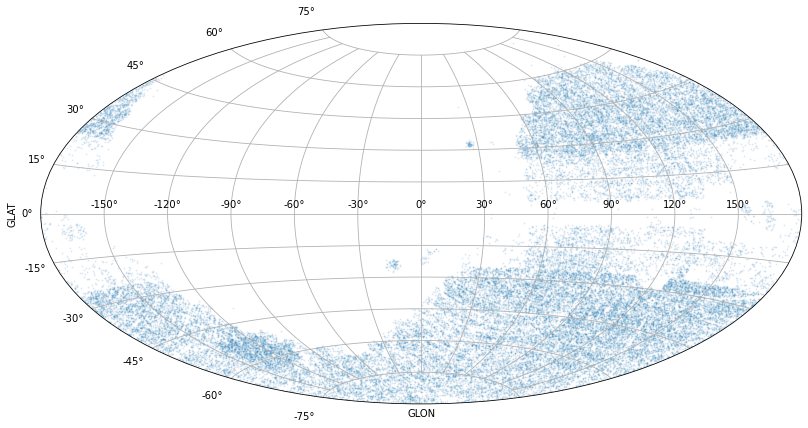

In [71]:
plt.figure(figsize=(14,7))
plt.subplot(111, projection='aitoff')
gaia_filt.viz.scatter("GLON", "GLAT", length_check=False, s=1, alpha=0.1)
plt.grid(True)
plt.show()

# GALAH

prereq: After joining with rave

In [7]:
name = "galah"
data_dir_galah = join(data_dir, name)
safe_mkdir(data_dir_galah)
data_dir_galah

Directory /home2/s20321005/Thesis-Project/Data/Combine/galah already exist. Good to go!


'/home2/s20321005/Thesis-Project/Data/Combine/galah'

In [8]:
name = "GALAH"
galah_dir = join(root_data_dir, name)
galah_files = glob(join(galah_dir, "*.hdf5"))
galah_files.sort()
galah = vaex.open_many(galah_files)
galah

#,source_id,teff_galah,e_teff_galah,logg_galah,e_logg_galah,feh_galah,e_feh_galah,alphafe_galah,e_alphafe_galah,rv_galah,e_rv_galah
0,4667368899326730240,4553.3545,137.06088556228917,4.7149534,0.20121636742743593,-0.33501863,0.12021913955493135,0.35136763119226394,0.07919326531297675,36.20399856567383,0.18299999833106995
1,4667362989451832320,3622.7446,104.98349008795871,4.6915054,0.19856208380453938,nan,nan,nan,nan,55.373325571289065,0.7317890322419305
2,4667324643983679488,4852.4756,172.75096900138723,2.4668846,0.22319904274460833,-1.1701574,0.18190171456363485,0.27304791329884204,0.0853664789169457,95.87799835205078,0.1509999930858612
3,4667335913977929728,5588.5005,104.29455501889545,3.9993572,0.18612670726590325,0.052394867,0.09937209372391331,-0.015429693609670742,0.05371322433644004,7.130000114440918,0.12600000202655792
4,4667323681911007232,5709.503,109.2033998665521,4.1819053,0.18470374660212685,-0.013732433,0.11137627470861318,0.08102261072159844,0.0803723809132596,24.81599998474121,0.16300000250339508
...,...,...,...,...,...,...,...,...,...,...,...
"588,056",6003344796319529984,4531.2153,71.12315268169422,2.4103317,0.18300246561395928,-0.29380798,0.04297140239160699,0.157507937659917,0.01185075698787861,58.42599868774414,0.05700000002980232
"588,057",6000435312445129728,6059.4995,89.92103435161873,3.5193155,0.1905389116378251,-0.04507351,0.09163415120321836,0.003646820192376051,0.04083085258215475,0.2770000100135803,0.10999999940395355
"588,058",6000421607212226560,4132.9727,83.45848117487678,0.95939153,0.3021431599031527,-1.003942,0.06525723837358276,0.1258948343706562,0.028202345502403702,37.00600051879883,0.06700000166893005
"588,059",6000420675196587008,4776.9272,98.42247509802459,2.4207969,0.22091855410307684,0.007314205,0.07383443001503355,-0.022905150506586088,0.0371291787455343,-69.5719985961914,0.0560000017285347


In [11]:
# Join with galah
cols = galah.column_names
for file in gaia_files:
    gaia_clean = vaex.open(file)
    gaia_pandas = gaia_clean.to_pandas_df()
    gaia_pandas = gaia_pandas.drop_duplicates(subset=['source_id'])
    gaia_clean = vaex.from_pandas(gaia_pandas)
    join_galah = galah.join(gaia_clean, on="source_id", how="inner")
    for col in cols:
        if col == "source_id": continue
        join_galah[col] = join_galah[col].to_pandas_series().to_numpy() # Do this to make np.nan value to no value
    name = file.split('/')[-1]
    join_galah.export(join(data_dir_galah, name), progress=True) # save if necessary
    print(f"saved {name} | {len(join_galah)}")
    # break
# sneak peek
# join_galah

export(hdf5) [########################################] 100.00% elapsed time  :     0.64s =  0.0m =  0.0h  
 saved gaia-000-001.hdf5 | 228
export(hdf5) [########################################] 100.00% elapsed time  :     0.89s =  0.0m =  0.0h
 saved gaia-001-002.hdf5 | 219
export(hdf5) [########################################] 100.00% elapsed time  :     0.61s =  0.0m =  0.0h 
 saved gaia-002-003.hdf5 | 93
export(hdf5) [########################################] 100.00% elapsed time  :     0.57s =  0.0m =  0.0h 
 saved gaia-003-004.hdf5 | 131
export(hdf5) [########################################] 100.00% elapsed time  :     0.57s =  0.0m =  0.0h
 saved gaia-004-005.hdf5 | 84
export(hdf5) [########################################] 100.00% elapsed time  :     0.76s =  0.0m =  0.0h
 saved gaia-005-006.hdf5 | 84
export(hdf5) [########################################] 100.00% elapsed time  :     0.58s =  0.0m =  0.0h  
 saved gaia-006-007.hdf5 | 77
export(hdf5) [#########################

In [12]:
#quick look
quick = vaex.open_many(glob(join(data_dir_galah, "*.hdf5")))
quick

#,source_id,teff_galah,e_teff_galah,logg_galah,e_logg_galah,feh_galah,e_feh_galah,alphafe_galah,e_alphafe_galah,rv_galah,e_rv_galah,ra,dec,Jmag,Kmag,ph_qual,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs
0,6098430282707403776,4925.185,84.86563555391315,3.1189532,0.1915470417050295,-0.5029211,0.05576718275629655,0.2941651109053885,0.021524796892521944,-2.0759999752044678,0.04899999871850014,219.073758,-45.268192,10.539,9.897,AAA,14.955199,-12.61246932437258,0.01922076,-8.036391669260098,0.01695222,1.1578140814486475,0.01694725,12.183537,12.738563,11.47299,2384.3645,3094.5044,1.1656907,1.2448673,-2.5427516,0.7113203,321.59976636117415,13.768894850338276,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-0.27,-0.34,-0.17,0.19,0.09,0.26,nan,nan,nan,K
1,6216723444498753536,4323.901,75.94068803531849,1.9899591,0.22562526106062836,-0.31130314,0.05107833135008695,0.2022596587624252,0.016941882189393805,40.03099822998047,0.05400000140070915,219.607239,-31.944876,10.057,9.226,AAA,8.073132,-5.765841837353903,0.018399537,-5.6507100309216725,0.016273092,0.49764493462061066,0.016969796,11.911889,12.606884,11.108785,1082.6482,2268.093,1.1346349,1.2643284,40.36963,0.30063808,328.0010622812772,25.666614069312857,4698.641,4693.341,4703.736,2.5535,2.5433,2.5656,0.1291,0.1271,0.1317,1680.957,1659.505,1698.9655,0.5652,0.561,0.5696,-0.19,-0.23,-0.14,0.07,0.04,0.1,nan,nan,nan,K
2,6216766600330371072,4719.845,114.16901496722916,2.0375638,0.34444251464983183,-0.96745586,0.10245708429779109,0.1867933261652754,0.044449920958006366,43.803001403808594,0.08799999952316284,219.277321,-31.961212,11.926,11.229,AAA,13.226132,-12.883402626750653,0.024441212,-2.991406074899632,0.025550244,0.15791920937425186,0.018298225,13.639713,14.2252035,12.9085455,635.5337,1076.7366,1.1643857,1.2483627,42.160763,2.8773258,327.71434161664865,25.775733347644834,5301.5737,5279.999,5337.344,2.9922,2.9716,3.0289,-0.1582,-0.1657,-0.1519,2807.2637,2688.896,2877.6204,0.7033,0.69,0.727,nan,nan,nan,nan,nan,nan,nan,nan,nan,K
3,6216715232521262080,5566.561,105.1090760846353,3.9564025,0.19701027199293397,-0.3896041,0.09905542372334561,0.1841170800806152,0.0575447483897608,3.4779999256134033,0.13099999725818634,219.452886,-32.065094,12.8,12.432,AAA,10.764246,-10.129916543893728,0.028620066,3.6405751918565996,0.026068967,0.9645442482067451,0.024184085,13.987254,14.356501,13.449338,832.4943,1509.4949,1.203882,1.2069856,2.2768767,4.9364448,327.8118632854666,25.616866482305024,5415.562,5370.595,5509.543,4.1641,4.1465,4.1814,-0.6891,-0.739,-0.5851,921.1653,894.5917,950.1966,0.0577,0.0327,0.1091,nan,nan,nan,nan,nan,nan,nan,nan,nan,G
4,6216691176407302144,4675.6123,97.74289223029935,2.9080982,0.2094758878939486,-0.33815098,0.07823057836458414,0.27247678156177235,0.0356540892445996,-25.65999984741211,0.057999998331069946,219.390308,-32.135536,11.68,11.064,AAA,5.1498046,-2.6453103761693133,0.023559058,4.418463592291289,0.027172897,0.6237309293638778,0.02000928,13.261251,13.810853,12.564111,1704.2806,1858.3394,1.2626932,1.2371078,-26.50084,1.5984969,327.7246700162086,25.577034709990254,4945.634,4937.23,4953.5386,3.3264,3.3028,3.3438,-0.1109,-0.1264,-0.1018,1193.4197,1170.4854,1228.6744,0.328,0.3213,0.3342,nan,nan,nan,nan,nan,nan,nan,nan,nan,K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"11

In [13]:
gaia_filt = quick.filter("1000/parallax < 200")
gaia_filt = gaia_filt.extract()
gaia_filt

#,source_id,teff_galah,e_teff_galah,logg_galah,e_logg_galah,feh_galah,e_feh_galah,alphafe_galah,e_alphafe_galah,rv_galah,e_rv_galah,ra,dec,Jmag,Kmag,ph_qual,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs
0,4762676560087484416,3687.6062,115.03883802792768,4.5964494,0.20426346791783734,-0.08621979,0.2561546729529763,nan,nan,19.93138233590698,0.6426939107429573,79.787685,-59.316849,12.669,11.869,AAA,26.791288,-4.828621016073806,0.034066238,-26.35256214185902,0.029260905,5.1656045836321836,0.019595053,14.911711,15.914134,13.919635,352.9294,915.19977,1.045369,1.3377157,16.509394,4.938257,268.08122477603166,-34.758776374441624,5162.9116,5037.9385,5577.2104,4.7525,4.6841,4.7718,-1.8385,-2.6878,-1.2141,190.9959,186.2199,232.3561,1.8717,1.8109,2.1137,nan,nan,nan,nan,nan,nan,nan,nan,nan,M
1,2985258117629498368,4271.7407,96.8698000685738,4.598065,0.1885337645787672,0.006025791,0.08211892355065809,0.06201810405994518,0.03891703032110397,13.729999542236328,0.08299999684095383,79.708031,-14.027215,11.359,10.559,AAA,8.231165,-8.019272893316582,0.011507952,1.8556217429686575,0.011553078,6.628056021003535,0.01276695,13.305973,14.078657,12.445415,506.29892,673.78064,1.0614969,1.2858528,12.312799,1.4471185,215.6139347062728,-26.743646993808326,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-1.0,-3.69,0.45,-0.18,-0.2,0.11,nan,nan,nan,K
2,2988203159524176384,5887.555,96.05590698468323,4.3810186,0.18138845113992255,0.04120493,0.08479745702072343,0.014633800953492728,0.04435727015037087,15.567000389099121,0.10199999809265137,79.22313,-13.683658,13.975,13.289,AAA,18.853422,2.5972100352491765,0.056733422,-18.673671128599555,0.051073715,5.415749751983617,0.060235765,16.780539,18.167032,15.601656,52.189323,430.45486,1.0455546,1.4489499,nan,nan,215.0492971888301,-27.036867532691538,3422.0493,3418.9116,3425.1072,4.8878,4.8819,4.8935,-0.1603,-0.178,-0.1487,187.2052,185.3309,189.1695,0.4209,0.4122,0.4293,nan,nan,nan,nan,nan,nan,nan,nan,nan,M
3,2988318986203043840,5375.178,110.13403143376516,3.366373,1.4548715642776713,0.09743261,0.0972447577042696,0.08338948330342515,0.0520368977107614,80.43399810791016,0.2720000147819519,79.699187,-13.438265,11.999,11.507,AAA,10.833317,10.592520840852563,0.4221437,-2.2713975113212834,0.42285424,-0.9472309756581394,0.45036632,13.621444,13.765941,12.723768,1514.51,1700.4298,33.726967,1.5970867,73.68498,1.7880119,215.0070084576572,-26.514288386920093,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,F
4,2988365681086730752,4524.191,81.11192580024817,4.6405053,0.18130495748507608,0.03524828,0.05962766796744014,0.11168999287257027,0.03419723234256452,5.136000156402588,0.0689999982714653,79.298892,-13.175996,10.327,9.649,AAA,25.987564,-5.814174715093525,0.012658654,25.328814185703663,0.011988903,9.64805881268661,0.012517518,12.118762,12.792501,11.330532,2359.2114,3258.7766,1.1234632,1.2598878,4.9512706,0.31236562,214.56193557744763,-26.7640586815622,4516.4736,4513.405,4524.385,4.652,4.6428,4.6546,0.5037,0.4994,0.5321,104.4428,104.0556,106.4137,0.2052,0.2018,0.2116,-0.18,-0.25,0.0,0.2,0.17,0.22,nan,nan,nan,K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"4,714",6082792826477230080,4759.4893,110.28435065219219,4.5820503,0.1919488897076894,0.2766757,0.12320308099110766,-0.0943

In [14]:
gaia_filt["GLON"] = gaia_filt["GLON"]*np.pi/180 - np.pi
gaia_filt["GLAT"] = gaia_filt["GLAT"]*np.pi/180
gaia_filt

#,source_id,teff_galah,e_teff_galah,logg_galah,e_logg_galah,feh_galah,e_feh_galah,alphafe_galah,e_alphafe_galah,rv_galah,e_rv_galah,ra,dec,Jmag,Kmag,ph_qual,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs
0,4762676560087484416,3687.6062,115.03883802792768,4.5964494,0.20426346791783734,-0.08621979,0.2561546729529763,nan,nan,19.93138233590698,0.6426939107429573,79.787685,-59.316849,12.669,11.869,AAA,26.791288,-4.828621016073806,0.034066238,-26.35256214185902,0.029260905,5.1656045836321836,0.019595053,14.911711,15.914134,13.919635,352.9294,915.19977,1.045369,1.3377157,16.509394,4.938257,1.5373073815309573,-0.6066550916984237,5162.9116,5037.9385,5577.2104,4.7525,4.6841,4.7718,-1.8385,-2.6878,-1.2141,190.9959,186.2199,232.3561,1.8717,1.8109,2.1137,nan,nan,nan,nan,nan,nan,nan,nan,nan,M
1,2985258117629498368,4271.7407,96.8698000685738,4.598065,0.1885337645787672,0.006025791,0.08211892355065809,0.06201810405994518,0.03891703032110397,13.729999542236328,0.08299999684095383,79.708031,-14.027215,11.359,10.559,AAA,8.231165,-8.019272893316582,0.011507952,1.8556217429686575,0.011553078,6.628056021003535,0.01276695,13.305973,14.078657,12.445415,506.29892,673.78064,1.0614969,1.2858528,12.312799,1.4471185,0.6215804202147397,-0.4667646940330389,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-1.0,-3.69,0.45,-0.18,-0.2,0.11,nan,nan,nan,K
2,2988203159524176384,5887.555,96.05590698468323,4.3810186,0.18138845113992255,0.04120493,0.08479745702072343,0.014633800953492728,0.04435727015037087,15.567000389099121,0.10199999809265137,79.22313,-13.683658,13.975,13.289,AAA,18.853422,2.5972100352491765,0.056733422,-18.673671128599555,0.051073715,5.415749751983617,0.060235765,16.780539,18.167032,15.601656,52.189323,430.45486,1.0455546,1.4489499,nan,nan,0.6117256364550783,-0.47188235787102295,3422.0493,3418.9116,3425.1072,4.8878,4.8819,4.8935,-0.1603,-0.178,-0.1487,187.2052,185.3309,189.1695,0.4209,0.4122,0.4293,nan,nan,nan,nan,nan,nan,nan,nan,nan,M
3,2988318986203043840,5375.178,110.13403143376516,3.366373,1.4548715642776713,0.09743261,0.0972447577042696,0.08338948330342515,0.0520368977107614,80.43399810791016,0.2720000147819519,79.699187,-13.438265,11.999,11.507,AAA,10.833317,10.592520840852563,0.4221437,-2.2713975113212834,0.42285424,-0.9472309756581394,0.45036632,13.621444,13.765941,12.723768,1514.51,1700.4298,33.726967,1.5970867,73.68498,1.7880119,0.6109875588596205,-0.4627616311750518,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,F
4,2988365681086730752,4524.191,81.11192580024817,4.6405053,0.18130495748507608,0.03524828,0.05962766796744014,0.11168999287257027,0.03419723234256452,5.136000156402588,0.0689999982714653,79.298892,-13.175996,10.327,9.649,AAA,25.987564,-5.814174715093525,0.012658654,25.328814185703663,0.011988903,9.64805881268661,0.012517518,12.118762,12.792501,11.330532,2359.2114,3258.7766,1.1234632,1.2598878,4.9512706,0.31236562,0.6032195716886286,-0.46712094519023295,4516.4736,4513.405,4524.385,4.652,4.6428,4.6546,0.5037,0.4994,0.5321,104.4428,104.0556,106.4137,0.2052,0.2018,0.2116,-0.18,-0.25,0.0,0.2,0.17,0.22,nan,nan,nan,K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"4,714",6082792826477230080,4759.4893,110.28435065219219,4.5820503,0.1919488897076894,0.2766757,0.12320308099110766,

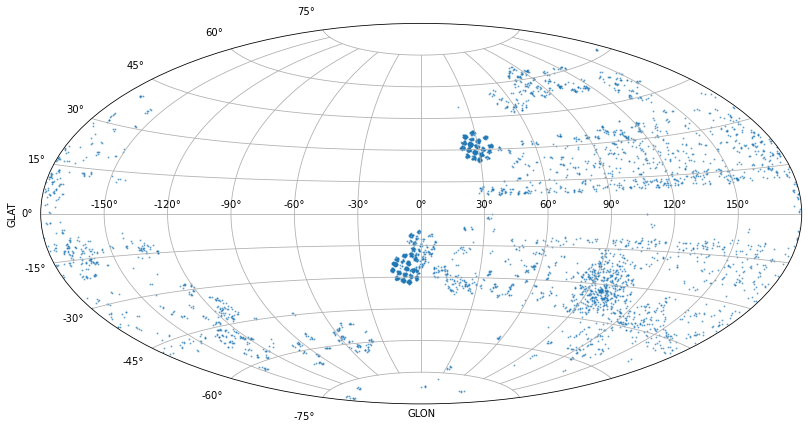

In [16]:
plt.figure(figsize=(14,7))
plt.subplot(111, projection='aitoff')
gaia_filt.viz.scatter("GLON", "GLAT", length_check=False, s=1, alpha=0.5)
plt.grid(True)
plt.show()

# Lamost

prereq: galah and rave

In [17]:
name = "lamost"
data_dir_lamost = join(data_dir, name)
safe_mkdir(data_dir_lamost)
data_dir_lamost

Creating /home2/s20321005/Thesis-Project/Data/Combine/lamost dir in Data dir


'/home2/s20321005/Thesis-Project/Data/Combine/lamost'

In [18]:
name = "LAMOST"
lamost_dir = join(root_data_dir, name)
lamost_files = glob(join(lamost_dir, "*.hdf5"))
lamost_files.sort()
lamost = vaex.open_many(lamost_files)
lamost

#,subclass_lamost,teff_lamost,e_teff_lamost,logg_lamost,e_logg_lamost,feh_lamost,e_feh_lamost,rv_lamost,e_rv_lamost,alpham_lamost,e_alpham_lamost,source_id
0,F9,5580.10009765625,110.20999908447266,4.593999862670898,0.1770000010728836,-0.01899999938905239,0.11599999666213989,26.200000762939453,9.449999809265137,0.1918340027332306,0.04679799824953079,2676865000324707584
1,G0,5719.72021484375,90.4000015258789,3.9660000801086426,0.14100000262260437,-0.23499999940395355,0.09399999678134918,1.7300000190734863,8.5600004196167,0.15432800352573395,0.050794001668691635,2676120459154270336
2,F6,5931.68994140625,95.66000366210938,4.370999813079834,0.15000000596046448,-1.0290000438690186,0.10000000149011612,15.5600004196167,8.869999885559082,0.189191997051239,0.051621001213788986,2676863969532562688
3,F5,6080.14990234375,39.88999938964844,4.144999980926514,0.05700000002980232,-1.024999976158142,0.035999998450279236,-24.649999618530273,5.5,0.1367579996585846,0.031055999919772148,2676876029800730368
4,F9,5576.39013671875,48.91999816894531,4.090000152587891,0.06700000166893005,0.36800000071525574,0.04600000008940697,-22.690000534057617,6.460000038146973,-0.08894199877977371,0.06206300109624863,2676925576543545856
...,...,...,...,...,...,...,...,...,...,...,...,...
"2,730,468",F2,5953.259765625,79.33000183105469,3.8310000896453857,0.12600000202655792,-0.23899999260902405,0.08399999886751175,23.84000015258789,6.980000019073486,0.21720999479293823,0.03240000084042549,1822777905628141696
"2,730,469",F5,6281.47021484375,75.88999938964844,4.21999979019165,0.11800000071525574,-0.17499999701976776,0.07900000363588333,0.2199999988079071,7.260000228881836,-0.06826099753379822,0.02922699972987175,1822773851178836608
"2,730,470",G5,5226.2998046875,46.45000076293945,3.0510001182556152,0.06700000166893005,-0.007000000216066837,0.04100000113248825,-13.65999984741211,6.360000133514404,-0.18201999366283417,0.08307900279760361,1822606450533050880
"2,730,471",G5,4736.02001953125,62.380001068115234,3.259000062942505,0.0989999994635582,-0.07599999755620956,0.06499999761581421,17.81999969482422,5.639999866485596,0.3313809931278229,0.05764999985694885,1822593668710339328


In [22]:
# Join with lamost
cols = lamost.column_names
for file in gaia_files:
    t0 = time()
    gaia_clean = vaex.open(file)
    gaia_pandas = gaia_clean.to_pandas_df()
    gaia_pandas = gaia_pandas.drop_duplicates(subset=['source_id'])
    gaia_clean = vaex.from_pandas(gaia_pandas)
    join_lamost = lamost.join(gaia_clean, on="source_id", how="inner")
    for col in cols:
        if col == "source_id": continue
        join_lamost[col] = join_lamost[col].to_pandas_series().to_numpy() # Do this to make np.nan value to no value
    name = file.split('/')[-1]
    join_lamost.export(join(data_dir_lamost, name), progress=True) # save if necessary
    t1 = time()
    print(f"saved {name} | {len(join_lamost)} | {datetime.now()} | {t1-t0:.2f} s")

# sneak peek
join_lamost

export(hdf5) [########################################] 100.00% elapsed time  :     1.15s =  0.0m =  0.0h 
 saved gaia-000-001.hdf5 | 7723 | 2023-05-16 08:28:51.832484 | 1.85 s
export(hdf5) [########################################] 100.00% elapsed time  :     0.92s =  0.0m =  0.0h
 saved gaia-001-002.hdf5 | 8603 | 2023-05-16 08:28:53.408528 | 1.58 s
export(hdf5) [########################################] 100.00% elapsed time  :     0.90s =  0.0m =  0.0h
 saved gaia-002-003.hdf5 | 8784 | 2023-05-16 08:28:55.927199 | 2.52 s
export(hdf5) [########################################] 100.00% elapsed time  :     0.83s =  0.0m =  0.0h
 saved gaia-003-004.hdf5 | 8737 | 2023-05-16 08:28:58.423141 | 2.50 s
export(hdf5) [########################################] 100.00% elapsed time  :     0.93s =  0.0m =  0.0h 
 saved gaia-004-005.hdf5 | 8815 | 2023-05-16 08:29:00.933657 | 2.51 s
export(hdf5) [########################################] 100.00% elapsed time  :     1.04s =  0.0m =  0.0h
 saved gaia-

#,subclass_lamost,teff_lamost,e_teff_lamost,logg_lamost,e_logg_lamost,feh_lamost,e_feh_lamost,rv_lamost,e_rv_lamost,alpham_lamost,e_alpham_lamost,source_id,ra,dec,Jmag,Kmag,ph_qual,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs
0,G1,5831.16015625,53.91999816894531,4.091000080108643,0.07100000232458115,-0.23399999737739563,0.050999999046325684,-79.7300033569336,6.929999828338623,0.11897200345993042,0.03219800069928169,2854623904181683072,359.047332,27.863043,13.426,13.086,AAA,5.9566827,-5.921642588613551,0.02180277,-0.6451493086142337,0.013783556,0.7955135471653407,0.021311976,14.487686,14.810523,13.997293,1572.5712,1757.1401,0.9222417,1.1999391,-87.66561,8.730974,108.28218398093703,-33.43214570436419,5695.1396,5673.9907,5718.5645,4.2405,4.227,4.2527,-0.4572,-0.4802,-0.4341,1171.635,1145.903,1199.5381,0.0389,0.0284,0.0511,nan,nan,nan,nan,nan,nan,nan,nan,nan,F
1,G3,5691.259765625,51.18000030517578,4.142000198364258,0.06800000369548798,-0.0949999988079071,0.05000000074505806,-7.630000114440918,6.300000190734863,0.02745800092816353,0.038892000913619995,2855057627159171840,359.54038,28.675152,13.584,13.193,AAA,14.273664,11.795892025353977,0.024558337,8.037066299566042,0.0155413225,0.9263079442031827,0.023654236,14.714018,15.086855,14.17365,751.96844,1190.0022,0.9713401,1.2068428,nan,nan,109.0258936202909,-32.7538434059861,5699.2773,5687.038,5711.574,4.3239,4.2936,4.3447,-0.1219,-0.1375,-0.1053,962.9875,934.0191,1005.0557,0.2038,0.1973,0.2106,nan,nan,nan,nan,nan,nan,nan,nan,nan,G
2,G2,5752.6201171875,54.279998779296875,3.9170000553131104,0.07500000298023224,-0.07999999821186066,0.05299999937415123,1.8799999952316284,6.380000114440918,-0.09864699840545654,0.031085999682545662,2855035701349967616,359.272889,28.598766,13.98,13.515,AAA,5.9419904,3.7364086051432133,0.028780695,-4.620227498250769,0.020036923,0.5820948508139944,0.029849462,15.10261,15.465865,14.568283,965.8926,1073.1453,1.0038882,1.2075608,nan,nan,108.73284943849036,-32.7701276010125,5757.1797,5740.734,5771.455,4.1532,4.121,4.1834,-0.221,-0.2379,-0.2065,1431.1085,1380.4034,1480.9572,0.2194,0.2118,0.2268,nan,nan,nan,nan,nan,nan,nan,nan,nan,F
3,G3,5627.669921875,79.97000122070312,4.203999996185303,0.12300000339746475,-0.06199999898672104,0.08299999684095383,-59.47999954223633,7.840000152587891,0.12370699644088745,0.036010999232530594,2855034296896723456,359.330712,28.530275,13.939,13.479,AAA,4.589789,-3.975230433018028,0.027231332,2.294276426845971,0.01881828,0.9127916084302867,0.027499927,15.087369,15.46833,14.539136,609.31555,985.18384,0.96429306,1.2080419,nan,nan,108.77111234038033,-32.84904101537336,5421.892,5386.661,5478.435,4.4009,4.3857,4.4165,-0.2949,-0.3355,-0.233,1030.9531,1002.9628,1065.8204,0.0824,0.0632,0.1146,nan,nan,nan,nan,nan,nan,nan,nan,nan,G
4,G5,5341.16015625,45.290000915527344,4.348999977111816,0.06300000101327896,-0.33899998664855957,0.041999999433755875,-70.18000030517578,6.039999961853027,0.42556700110435486,0.038033001124858856,2855035740005733632,359.290173,28.598089,13.627,13.165,AAA,8.114808,-6.34463656656584,0.025425417,-5.059219535158171,0.018043566,1.1962890357250378,0.027369907,14.89704,15.312399,14.3151455,661.0517,928.91144,0.9716634,1.2140809,nan,nan,108.7500734065222,-32.77455625824143,5441.1816,5426.5645,5456.4014,4.5457,4.5388,4.5527,-0.4665,-0.484,-0.4493,673.197,664.8612,681.9337,0.1953,0.1885,0.2022,nan,nan,nan,nan,nan,nan,nan,nan,nan,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [23]:
#quick look
quick = vaex.open_many(glob(join(data_dir_lamost, "*.hdf5")))
quick

#,subclass_lamost,teff_lamost,e_teff_lamost,logg_lamost,e_logg_lamost,feh_lamost,e_feh_lamost,rv_lamost,e_rv_lamost,alpham_lamost,e_alpham_lamost,source_id,ra,dec,Jmag,Kmag,ph_qual,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs
0,G7,5376.740234375,106.12000274658203,4.284999847412109,0.16699999570846558,-0.5699999928474426,0.11100000143051147,-17.440000534057617,9.680000305175781,0.39557498693466187,0.041554998606443405,1604392390701246336,219.548699,52.378448,13.617,13.27,AAA,28.019957,0.20798104072228796,0.017458625,-28.019184730174715,0.020617947,1.246792122849528,0.016953148,14.743205,15.09709,14.217924,730.108,952.54407,1.071385,1.2063468,nan,nan,91.92698508812103,57.84059651997731,5559.3403,5548.0107,5573.6294,4.5183,4.5117,4.5243,-0.5074,-0.524,-0.4904,715.3002,707.4778,724.2446,0.0783,0.0722,0.0859,nan,nan,nan,nan,nan,nan,nan,nan,nan,G
1,F9,5427.97998046875,94.05999755859375,4.361999988555908,0.14300000667572021,-0.41600000858306885,0.09600000083446503,-42.33000183105469,9.539999961853027,0.2438890039920807,0.05218999832868576,1604405962797891328,219.695984,52.708469,12.982,12.592,AAU,20.564713,3.681573582874475,0.013410158,-20.232483783659337,0.0155644575,1.5705872559320957,0.013935442,14.117551,14.475936,13.594182,1255.8519,1593.4358,0.95236856,1.2029796,-37.244064,3.184654,92.27934767926196,57.555078252754335,5597.9834,5577.0576,5735.246,4.4775,4.4656,4.4992,-0.2808,-0.306,-0.121,594.3681,586.2258,637.2172,0.094,0.0825,0.1653,nan,nan,nan,nan,nan,nan,nan,nan,nan,G
2,G7,5305.97021484375,87.19000244140625,4.385000228881836,0.13699999451637268,-0.2709999978542328,0.09099999815225601,-28.700000762939453,8.039999961853027,0.3661539852619171,0.047134000808000565,1605919200035137024,219.950418,53.05418,14.018,13.618,AAA,7.088561,0.055196992231455244,0.023857106,-7.088346267982947,0.025487687,1.0355000566699821,0.021073475,15.203764,15.58644,14.653145,561.22363,745.5941,0.98287743,1.2087713,nan,nan,92.57069885755435,57.21088621718185,5408.5444,5384.8047,5456.5,4.5202,4.4983,4.5328,-0.2774,-0.3056,-0.2277,851.5513,832.7238,893.5139,0.0699,0.0566,0.0971,nan,nan,nan,nan,nan,nan,nan,nan,nan,G
3,G8,5206.60986328125,72.0999984741211,4.559999942779541,0.1080000028014183,-0.2160000056028366,0.0729999989271164,3.0299999713897705,7.550000190734863,0.2370080053806305,0.0620030015707016,1606670647513649792,219.874672,53.17308,13.762,13.276,AAA,11.355421,-9.508700553071032,0.021453138,6.207270065125295,0.023053821,1.327885873285299,0.019471737,14.997768,15.414695,14.416744,766.80774,799.5211,0.9391283,1.2127903,nan,nan,92.7905388475692,57.165791445553666,5237.2246,5224.7783,5250.5215,4.5377,4.5309,4.5465,-0.1583,-0.1709,-0.1451,709.0456,701.5769,716.2143,0.0638,0.0558,0.0714,nan,nan,nan,nan,nan,nan,nan,nan,nan,K
4,G3,5861.77978515625,72.98999786376953,4.258999824523926,0.10899999737739563,0.13199999928474426,0.07400000095367432,16.34000015258789,7.630000114440918,-0.010262000374495983,0.04225600138306618,1606671472147344384,219.83576,53.190643,13.796,13.434,AAA,2.4853091,-1.608631647062482,0.021048134,-1.8944829162032963,0.022929845,0.6795844121598658,0.020270258,14.852749,15.179219,14.365052,798.23804,1152.0037,1.0127348,1.1964996,nan,nan,92.84333366406406,57.17146910638298,5673.2397,5666.5137,5686.361,4.2714,4.2569,4.2875,-0.1335,-0.1488,-0.1174,1369.7844,1330.8951,1409.1501,0.0043,0.0011,0.0115,nan,nan,nan,nan,nan,nan,nan,nan,nan,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [24]:
a = quick.dropna(['rv_lamost'])
a

#,subclass_lamost,teff_lamost,e_teff_lamost,logg_lamost,e_logg_lamost,feh_lamost,e_feh_lamost,rv_lamost,e_rv_lamost,alpham_lamost,e_alpham_lamost,source_id,ra,dec,Jmag,Kmag,ph_qual,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs
0,G7,5376.740234375,106.12000274658203,4.284999847412109,0.16699999570846558,-0.5699999928474426,0.11100000143051147,-17.440000534057617,9.680000305175781,0.39557498693466187,0.041554998606443405,1604392390701246336,219.548699,52.378448,13.617,13.27,AAA,28.019957,0.20798104072228796,0.017458625,-28.019184730174715,0.020617947,1.246792122849528,0.016953148,14.743205,15.09709,14.217924,730.108,952.54407,1.071385,1.2063468,nan,nan,91.92698508812103,57.84059651997731,5559.3403,5548.0107,5573.6294,4.5183,4.5117,4.5243,-0.5074,-0.524,-0.4904,715.3002,707.4778,724.2446,0.0783,0.0722,0.0859,nan,nan,nan,nan,nan,nan,nan,nan,nan,G
1,F9,5427.97998046875,94.05999755859375,4.361999988555908,0.14300000667572021,-0.41600000858306885,0.09600000083446503,-42.33000183105469,9.539999961853027,0.2438890039920807,0.05218999832868576,1604405962797891328,219.695984,52.708469,12.982,12.592,AAU,20.564713,3.681573582874475,0.013410158,-20.232483783659337,0.0155644575,1.5705872559320957,0.013935442,14.117551,14.475936,13.594182,1255.8519,1593.4358,0.95236856,1.2029796,-37.244064,3.184654,92.27934767926196,57.555078252754335,5597.9834,5577.0576,5735.246,4.4775,4.4656,4.4992,-0.2808,-0.306,-0.121,594.3681,586.2258,637.2172,0.094,0.0825,0.1653,nan,nan,nan,nan,nan,nan,nan,nan,nan,G
2,G7,5305.97021484375,87.19000244140625,4.385000228881836,0.13699999451637268,-0.2709999978542328,0.09099999815225601,-28.700000762939453,8.039999961853027,0.3661539852619171,0.047134000808000565,1605919200035137024,219.950418,53.05418,14.018,13.618,AAA,7.088561,0.055196992231455244,0.023857106,-7.088346267982947,0.025487687,1.0355000566699821,0.021073475,15.203764,15.58644,14.653145,561.22363,745.5941,0.98287743,1.2087713,nan,nan,92.57069885755435,57.21088621718185,5408.5444,5384.8047,5456.5,4.5202,4.4983,4.5328,-0.2774,-0.3056,-0.2277,851.5513,832.7238,893.5139,0.0699,0.0566,0.0971,nan,nan,nan,nan,nan,nan,nan,nan,nan,G
3,G8,5206.60986328125,72.0999984741211,4.559999942779541,0.1080000028014183,-0.2160000056028366,0.0729999989271164,3.0299999713897705,7.550000190734863,0.2370080053806305,0.0620030015707016,1606670647513649792,219.874672,53.17308,13.762,13.276,AAA,11.355421,-9.508700553071032,0.021453138,6.207270065125295,0.023053821,1.327885873285299,0.019471737,14.997768,15.414695,14.416744,766.80774,799.5211,0.9391283,1.2127903,nan,nan,92.7905388475692,57.165791445553666,5237.2246,5224.7783,5250.5215,4.5377,4.5309,4.5465,-0.1583,-0.1709,-0.1451,709.0456,701.5769,716.2143,0.0638,0.0558,0.0714,nan,nan,nan,nan,nan,nan,nan,nan,nan,K
4,G3,5861.77978515625,72.98999786376953,4.258999824523926,0.10899999737739563,0.13199999928474426,0.07400000095367432,16.34000015258789,7.630000114440918,-0.010262000374495983,0.04225600138306618,1606671472147344384,219.83576,53.190643,13.796,13.434,AAA,2.4853091,-1.608631647062482,0.021048134,-1.8944829162032963,0.022929845,0.6795844121598658,0.020270258,14.852749,15.179219,14.365052,798.23804,1152.0037,1.0127348,1.1964996,nan,nan,92.84333366406406,57.17146910638298,5673.2397,5666.5137,5686.361,4.2714,4.2569,4.2875,-0.1335,-0.1488,-0.1174,1369.7844,1330.8951,1409.1501,0.0043,0.0011,0.0115,nan,nan,nan,nan,nan,nan,nan,nan,nan,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [25]:
gaia_filt = quick.filter("1000/parallax < 200")
gaia_filt = gaia_filt.extract()
gaia_filt

#,subclass_lamost,teff_lamost,e_teff_lamost,logg_lamost,e_logg_lamost,feh_lamost,e_feh_lamost,rv_lamost,e_rv_lamost,alpham_lamost,e_alpham_lamost,source_id,ra,dec,Jmag,Kmag,ph_qual,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs
0,G4,5613.7900390625,43.810001373291016,4.13100004196167,0.06199999898672104,0.2370000034570694,0.03700000047683716,-5.869999885559082,5.840000152587891,0.10656499862670898,0.04942400008440018,3651600165930541056,219.866531,-0.250492,13.096,12.208,DDA,97.66062,-86.17237568576176,0.12510233,-45.955621279894885,0.119029544,11.629292907114307,0.11534058,16.4341,17.846214,15.067873,21.0305,39.040676,0.87170243,1.6790266,nan,nan,350.8423182941728,52.273040651434286,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,
1,G9,5202.18994140625,35.16999816894531,4.663000106811523,0.05000000074505806,0.12099999934434891,0.029999999329447746,-68.52999877929688,4.690000057220459,0.09362500160932541,0.09168700128793716,1285835628429110656,219.514222,30.694674,10.417,9.931,AAA,36.971153,-34.01569185797028,0.037285153,14.484436122845704,0.038904697,6.077970004508456,0.035022896,11.707044,12.141154,11.09948,2147.0105,3150.197,2.5769024,1.2228211,-49.17504,0.49092868,48.00293796926012,66.45303755511974,5122.5225,5073.7485,5141.4463,4.4822,4.4207,4.4915,-0.1568,-0.189,-0.1394,165.5973,163.6056,182.826,0.0715,0.0401,0.0832,-0.01,-0.05,0.01,0.04,0.01,0.1,-0.04,-0.18,0.05,K
2,G7,5231.06982421875,16.530000686645508,3.5910000801086426,0.020999999716877937,-0.8040000200271606,0.009999999776482582,-55.70000076293945,3.009999990463257,0.4993849992752075,0.031787000596523285,1286105214936232576,219.199523,31.362679,8.259,7.777,AAA,6.6697793,2.6843674363151737,0.015192252,-6.105745350771469,0.015472717,6.419094139530602,0.013792344,9.505011,9.892332,8.939357,3709.4321,3866.476,1.0176234,1.2163411,-47.16353,0.17701882,49.714534877996,66.68884482230223,5747.725,5714.723,5815.8877,3.8314,3.8175,3.8528,-0.5535,-0.6004,-0.4803,156.2445,154.9584,157.5354,0.2969,0.2794,0.327,-0.96,-1.0,-0.9,0.42,0.4,0.44,0.08,-0.04,0.19,K
3,G6,4606.85986328125,91.5199966430664,1.3509999513626099,0.1459999978542328,-1.3569999933242798,0.09600000083446503,80.52999877929688,8.050000190734863,0.40082699060440063,0.041161999106407166,1279291266500878720,219.881849,26.259455,14.268,13.561,AAA,2.7499905,-2.223021646417644,0.037077546,-1.6188336271810668,0.04176543,-0.03695454810277812,0.041916322,15.90856,16.489586,15.181564,403.9078,468.31628,0.9892512,1.2469391,nan,nan,37.07017252657645,65.88837749284221,5086.6167,5075.5957,5099.0693,3.1188,3.099,3.1377,-0.1601,-0.1609,-0.1594,6156.8774,6035.5176,6298.2114,0.5404,0.532,0.5495,nan,nan,nan,nan,nan,nan,nan,nan,nan,K
4,G8,5296.009765625,40.33000183105469,4.696000099182129,0.05700000002980232,0.3109999895095825,0.03700000047683716,-19.610000610351562,5.480000019073486,0.09318000078201294,0.08211600035429001,3668924414735112576,219.035466,4.622974,10.74,10.254,AAA,26.40154,-25.2530242971063,0.017931027,-7.702343047757056,0.01566745,5.22445198979103,0.015609771,12.023373,12.465595,11.419821,670.4361,849.39856,1.017426,1.2164851,-8.547238,1.1341054,355.5330491977026,56.3944694698668,5168.4897,5161.075,5175.5254,4.5189,4.5158,4.522,0.1143,0.1048,0.1238,189.9564,189.3847,190.5398,0.0812,0.0766,0.086,0.42,0.27,0.51,0.01,-0.02,0.06,nan,nan,nan,K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [26]:
gaia_filt["GLON"] = gaia_filt["GLON"]*np.pi/180 - np.pi
gaia_filt["GLAT"] = gaia_filt["GLAT"]*np.pi/180
gaia_filt

#,subclass_lamost,teff_lamost,e_teff_lamost,logg_lamost,e_logg_lamost,feh_lamost,e_feh_lamost,rv_lamost,e_rv_lamost,alpham_lamost,e_alpham_lamost,source_id,ra,dec,Jmag,Kmag,ph_qual,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs
0,G4,5613.7900390625,43.810001373291016,4.13100004196167,0.06199999898672104,0.2370000034570694,0.03700000047683716,-5.869999885559082,5.840000152587891,0.10656499862670898,0.04942400008440018,3651600165930541056,219.866531,-0.250492,13.096,12.208,DDA,97.66062,-86.17237568576176,0.12510233,-45.955621279894885,0.119029544,11.629292907114307,0.11534058,16.4341,17.846214,15.067873,21.0305,39.040676,0.87170243,1.6790266,nan,nan,2.9817609559734572,0.9123366693963698,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,
1,G9,5202.18994140625,35.16999816894531,4.663000106811523,0.05000000074505806,0.12099999934434891,0.029999999329447746,-68.52999877929688,4.690000057220459,0.09362500160932541,0.09168700128793716,1285835628429110656,219.514222,30.694674,10.417,9.931,AAA,36.971153,-34.01569185797028,0.037285153,14.484436122845704,0.038904697,6.077970004508456,0.035022896,11.707044,12.141154,11.09948,2147.0105,3150.197,2.5769024,1.2228211,-49.17504,0.49092868,-2.3037833353956034,1.1598243032882822,5122.5225,5073.7485,5141.4463,4.4822,4.4207,4.4915,-0.1568,-0.189,-0.1394,165.5973,163.6056,182.826,0.0715,0.0401,0.0832,-0.01,-0.05,0.01,0.04,0.01,0.1,-0.04,-0.18,0.05,K
2,G7,5231.06982421875,16.530000686645508,3.5910000801086426,0.020999999716877937,-0.8040000200271606,0.009999999776482582,-55.70000076293945,3.009999990463257,0.4993849992752075,0.031787000596523285,1286105214936232576,219.199523,31.362679,8.259,7.777,AAA,6.6697793,2.6843674363151737,0.015192252,-6.105745350771469,0.015472717,6.419094139530602,0.013792344,9.505011,9.892332,8.939357,3709.4321,3866.476,1.0176234,1.2163411,-47.16353,0.17701882,-2.2739103338712052,1.1639399165007467,5747.725,5714.723,5815.8877,3.8314,3.8175,3.8528,-0.5535,-0.6004,-0.4803,156.2445,154.9584,157.5354,0.2969,0.2794,0.327,-0.96,-1.0,-0.9,0.42,0.4,0.44,0.08,-0.04,0.19,K
3,G6,4606.85986328125,91.5199966430664,1.3509999513626099,0.1459999978542328,-1.3569999933242798,0.09600000083446503,80.52999877929688,8.050000190734863,0.40082699060440063,0.041161999106407166,1279291266500878720,219.881849,26.259455,14.268,13.561,AAA,2.7499905,-2.223021646417644,0.037077546,-1.6188336271810668,0.04176543,-0.03695454810277812,0.041916322,15.90856,16.489586,15.181564,403.9078,468.31628,0.9892512,1.2469391,nan,nan,-2.494596088718689,1.149969126047023,5086.6167,5075.5957,5099.0693,3.1188,3.099,3.1377,-0.1601,-0.1609,-0.1594,6156.8774,6035.5176,6298.2114,0.5404,0.532,0.5495,nan,nan,nan,nan,nan,nan,nan,nan,nan,K
4,G8,5296.009765625,40.33000183105469,4.696000099182129,0.05700000002980232,0.3109999895095825,0.03700000047683716,-19.610000610351562,5.480000019073486,0.09318000078201294,0.08211600035429001,3668924414735112576,219.035466,4.622974,10.74,10.254,AAA,26.40154,-25.2530242971063,0.017931027,-7.702343047757056,0.01566745,5.22445198979103,0.015609771,12.023373,12.465595,11.419821,670.4361,849.39856,1.017426,1.2164851,-8.547238,1.1341054,3.0636296545651014,0.9842691721645968,5168.4897,5161.075,5175.5254,4.5189,4.5158,4.522,0.1143,0.1048,0.1238,189.9564,189.3847,190.5398,0.0812,0.0766,0.086,0.42,0.27,0.51,0.01,-0.02,0.06,nan,nan,nan,K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

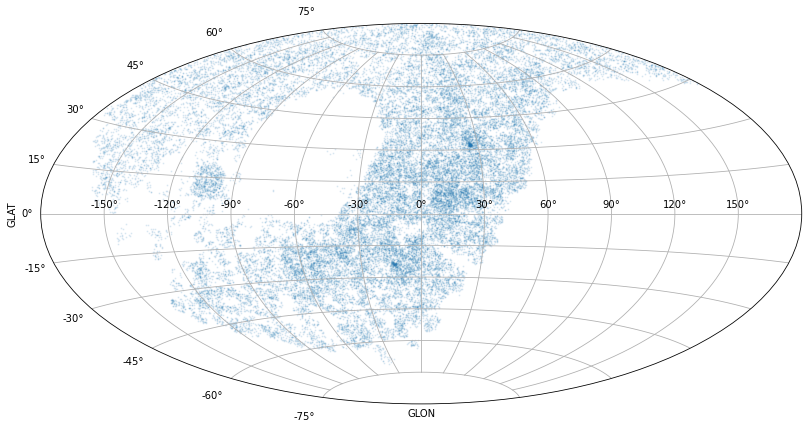

In [27]:
plt.figure(figsize=(14,7))
plt.subplot(111, projection='aitoff')
gaia_filt.viz.scatter("GLON", "GLAT", length_check=False, s=1, alpha=0.1)
plt.grid(True)
plt.show()

# Apogee
prereq: rave + galah + lamost

In [28]:
name = "apogee"
data_dir_apogee = join(data_dir, name)
safe_mkdir(data_dir_apogee)
data_dir_apogee

Creating /home2/s20321005/Thesis-Project/Data/Combine/apogee dir in Data dir


'/home2/s20321005/Thesis-Project/Data/Combine/apogee'

In [29]:
name = "APOGEE-2"
apogee_dir = join(root_data_dir, name)
apogee_files = glob(join(apogee_dir, "*.hdf5"))
apogee_files.sort()
apogee = vaex.open_many(apogee_files)
apogee

#,source_id,rv_apogee,e_rv_apogee,teff_apogee,e_teff_apogee,logg_apogee,e_logg_apogee,mh_apogee,e_mh_apogee,alpham_apogee,e_alpham_apogee,feh_apogee,e_feh_apogee
0,0,9.257312,0.024030898,5694.8984,25.380983,4.4285197,0.019973632,0.0056574,0.0050330725,0.0066791,0.0065177004,0.0034626,0.0054009217
1,538028216707715712,-51.731453,0.020595735,3723.9111,4.0603027,0.9045983,0.021523084,-0.14768,0.0071834084,0.036922,0.0047346926,-0.16068,0.009251297
2,2413929812587459072,19.073862,0.038598746,5501.773,25.553564,4.304115,0.024554765,-0.26875,0.00675281,0.0909783,0.007372802,-0.27553,0.0072527267
3,422596679964513792,-20.545164,0.065306276,6099.781,45.84733,3.6739705,0.030661006,-0.2451,0.007007128,0.0291593,0.0117554255,-0.25297,0.007645966
4,4689447878791422208,165.67194,0.18812515,4555.4043,21.23888,1.4988511,0.08263534,-1.1832,0.01980606,0.008442001,0.025910037,-1.1714,0.021403484
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"573,728",6379920759951899648,153.94682,0.35605833,4487.381,18.90609,1.0601541,0.07097957,-1.2784,0.020431846,-0.025169,0.024306789,-1.2551,0.022141216
"573,729",1998097371124974720,-60.971943,0.02575837,4859.9087,9.050734,2.4806874,0.024013065,-0.22925,0.0063499245,0.065434,0.006152061,-0.23656,0.0073373728
"573,730",1994741318040223232,-56.44069,0.025619794,4585.4097,11.298859,2.571437,0.028686192,0.11992,0.009224876,0.037709,0.007181833,0.11482,0.011620254
"573,731",6379914575198998272,159.40576,0.32404962,4509.5913,18.433924,1.3348875,0.07705193,-1.0418,0.018824669,-0.019309998,0.02346231,-1.0505,0.020959308


In [30]:
# Join with apogee
cols = apogee.column_names
for file in gaia_files:
    t0 = time()
    gaia_clean = vaex.open(file)
    gaia_pandas = gaia_clean.to_pandas_df()
    gaia_pandas = gaia_pandas.drop_duplicates(subset=['source_id'])
    gaia_clean = vaex.from_pandas(gaia_pandas)
    join_apogee = apogee.join(gaia_clean, on="source_id", how="left")
    for col in cols:
        if col == "source_id": continue
        join_apogee[col] = join_apogee[col].to_pandas_series().to_numpy() # Do this to make np.nan value to no value
    name = file.split('/')[-1]
    join_apogee.export(join(data_dir_apogee, name), progress=True) # save if necessary
    t1 = time()
    print(f"saved {name} | {len(join_apogee)} | {datetime.now()} | {t1-t0:.2f} s")
# sneak peek
join_apogee

export(hdf5) [########################################] 100.00% elapsed time  :     1.57s =  0.0m =  0.0h
 saved gaia-000-001.hdf5 | 573733 | 2023-05-16 09:20:28.749032 | 3.66 s
export(hdf5) [########################################] 100.00% elapsed time  :     1.55s =  0.0m =  0.0h
 saved gaia-001-002.hdf5 | 573733 | 2023-05-16 09:20:31.784190 | 3.04 s
export(hdf5) [########################################] 100.00% elapsed time  :     1.54s =  0.0m =  0.0h
 saved gaia-002-003.hdf5 | 573733 | 2023-05-16 09:20:34.786998 | 3.00 s
export(hdf5) [########################################] 100.00% elapsed time  :     1.68s =  0.0m =  0.0h
 saved gaia-003-004.hdf5 | 573733 | 2023-05-16 09:20:38.021553 | 3.23 s
export(hdf5) [########################################] 100.00% elapsed time  :     1.61s =  0.0m =  0.0h
 saved gaia-004-005.hdf5 | 573733 | 2023-05-16 09:20:41.146359 | 3.12 s
export(hdf5) [########################################] 100.00% elapsed time  :     1.51s =  0.0m =  0.0h 
 sa

KeyboardInterrupt: 

In [ ]:
#quick look
quick = vaex.open_many(glob(join(data_dir_apogee, "*.hdf5")))
quick

In [ ]:
gaia_filt = quick.filter("1000/parallax < 200")
gaia_filt = gaia_filt.extract()
gaia_filt

In [ ]:
gaia_filt["GLON"] = gaia_filt["GLON"]*np.pi/180 - np.pi
gaia_filt["GLAT"] = gaia_filt["GLAT"]*np.pi/180
gaia_filt

In [ ]:
plt.figure(figsize=(14,7))
plt.subplot(111, projection='aitoff')
gaia_filt.viz.scatter("GLON", "GLAT", length_check=False, s=1, alpha=0.1)
plt.grid(True)
plt.show()

# Combine All

In [ ]:
rave = vaex.open_many(glob(join(data_dir_rave, "*.hdf5")))
galah = vaex.open_many(glob(join(data_dir_galah, "*.hdf5")))
lamost = vaex.open_many(glob(join(data_dir_lamost, "*.hdf5")))
apogee = vaex.open_many(glob(join(data_dir_apogee, "*.hdf5")))

In [ ]:
# combine rave galah
join_rave_galah = rave.join(galah, on="source_id", how="outer")

In [ ]:
# combine rave galah lamost
join_rave_galah_lamost = join_rave_galah.join(lamost, on="source_id", how="outer")

In [ ]:
# combine rave galah lamost apogee
join_rave_galah_lamost_apogee = join_rave_galah_lamost.join(apogee, on="source_id", how="outer")

In [ ]:
# save to file
combine_dir = join(root_data_dir, "combine")
safe_mkdir(combine_dir)

In [ ]:
join_rave_galah_lamost_apogee.export(join(combine_dir, "combine.hdf5"), progress=True)